# The cell magics in IPython

IPython has a system of commands we call 'magics' that provide effectively a mini command language that is orthogonal to the syntax of Python and is extensible by the user with new commands.  Magics are meant to be typed interactively, so they use command-line conventions, such as using whitespace for separating arguments, dashes for options and other conventions typical of a command-line environment.

Magics come in two kinds:

* Line magics: these are commands prepended by one `%` character and whose arguments only extend to the end of the current line.
* Cell magics: these use *two* percent characters as a marker (`%%`), and they receive as argument *both* the current line where they are declared and the whole body of the cell.  Note that cell magics can *only* be used as the first line in a cell, and as a general principle they can't be 'stacked' (i.e. you can only use one cell magic per cell).  A few of them, because of how they operate, can be stacked, but that is something you will discover on a case by case basis.

The `%lsmagic` magic is used to list all available magics, and it will show both line and cell magics currently defined:

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %colors  %config  %connect_info  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gist  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lsmagic  %macro  %magic  %man  %matplotlib  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %run  %save  %sc  %store  %sx  %system  %tb  %tic  %time  %timeit  %toc  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %%prun  %%pypy  %%python  %%python3  %%ruby  %%script 

Since in the introductory section we already covered the most frequently used line magics, we will focus here on the cell magics, which offer a great amount of power.

Let's load matplotlib and numpy so we can use numerics/plotting at will later on.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## <!--====--> Some simple cell magics

Timing the execution of code; the 'timeit' magic exists both in line and cell form:

In [3]:
%timeit np.linalg.eigvals(np.random.rand(100,100))

100 loops, best of 3: 6.05 ms per loop


In [4]:
%%timeit a = np.random.rand(100, 100)
np.linalg.eigvals(a)

100 loops, best of 3: 6.07 ms per loop


The `%%capture` magic can be used to capture the stdout/err of any block of python code, either to discard it (if it's noise to you) or to store it in a variable for later use:

In [5]:
%%capture capt
from __future__ import print_function
import sys
print('Hello stdout')
print('and stderr', file=sys.stderr)

In [6]:
capt.stdout, capt.stderr

('Hello stdout\n', 'and stderr\n')

In [7]:
capt.show()

Hello stdout


and stderr


The `%%writefile` magic is a very useful tool that writes the cell contents as a named file:

In [8]:
%%writefile foo.py
print('Hello world')

Writing foo.py


In [9]:
%run foo

Hello world


## <!--====--> Magics for running code under other interpreters

IPython has a `%%script` cell magic, which lets you run a cell in
a subprocess of any interpreter on your system, such as: bash, ruby, perl, zsh, R, etc.

It can even be a script of your own, which expects input on stdin.

To use it, simply pass a path or shell command to the program you want to run on the `%%script` line,
and the rest of the cell will be run by that script, and stdout/err from the subprocess are captured and displayed.

In [10]:
%%script python
import sys
print 'hello from Python %s' % sys.version

hello from Python 2.7.2 (default, Oct 11 2012, 20:14:37) 
[GCC 4.2.1 Compatible Apple Clang 4.0 (tags/Apple/clang-418.0.60)]


In [11]:
%%script python3
import sys
print('hello from Python: %s' % sys.version)

hello from Python: 3.3.1 (v3.3.1:d9893d13c628, Apr  6 2013, 11:07:11) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


IPython also creates aliases for a few common interpreters, such as bash, ruby, perl, etc.

These are all equivalent to `%%script <name>`

In [12]:
%%ruby
puts "Hello from Ruby #{RUBY_VERSION}"

Hello from Ruby 1.9.3


In [13]:
%%bash
echo "hello from $BASH"

hello from /usr/local/bin/bash


## Exercise: write your own script that numbers input lines

Write a file, called `lnum.py`, such that the following cell works as shown (hint: don't forget about the executable bit!): 

In [29]:
%%script ./lnum.py
my first line
my second
more

0: my first line
1: my second
2: more
---- END ----


## Capturing output

You can also capture stdout/err from these subprocesses into Python variables, instead of letting them go directly to stdout/err

In [30]:
%%bash
echo "hi, stdout"
echo "hello, stderr" >&2


hi, stdout


hello, stderr


In [31]:
%%bash --out output --err error
echo "hi, stdout"
echo "hello, stderr" >&2

In [32]:
print(error)
print(output)

hello, stderr

hi, stdout



## Background Scripts

These scripts can be run in the background, by adding the `--bg` flag.

When you do this, output is discarded unless you use the `--out/err`
flags to store output as above.

In [33]:
%%ruby --bg --out ruby_lines
for n in 1...10
    sleep 1
    puts "line #{n}"
    STDOUT.flush
end

Starting job # 0 in a separate thread.


When you do store output of a background thread, these are the stdout/err *pipes*,
rather than the text of the output.

In [34]:
ruby_lines

<open file '<fdopen>', mode 'rb' at 0x112cd55d0>

In [35]:
print(ruby_lines.read())

line 1
line 2
line 3
line 4
line 5
line 6
line 7
line 8
line 9



# Cython Magic Functions Extension

## Loading the extension

IPtyhon has a `cythonmagic` extension that contains a number of magic functions for working with Cython code. This extension can be loaded using the `%load_ext` magic as follows:

In [1]:
%load_ext cythonmagic

The `%%cython_pyximport` magic allows you to enter arbitrary Cython code into a cell. That Cython code is written as a `.pyx` file in the current working directory and then imported using `pyximport`.  You have the specify the name of the module that the Code will appear in. All symbols from the module are imported automatically by the magic function.

In [4]:
%%cython_pyximport foo
def f(x):
    return 4.0*x

In [6]:
f(10)

40.0

## The %cython magic

Probably the most important magic is the `%cython` magic.  This is similar to the `%%cython_pyximport` magic, but doesn't require you to specify a module name. Instead, the `%%cython` magic uses manages everything using temporary files in the `~/.cython/magic` directory.  All of the symbols in the Cython module are imported automatically by the magic.

Here is a simple example of a Black-Scholes options pricing algorithm written in Cython:

In [7]:
%%cython
cimport cython
from libc.math cimport exp, sqrt, pow, log, erf

@cython.cdivision(True)
cdef double std_norm_cdf(double x) nogil:
    return 0.5*(1+erf(x/sqrt(2.0)))

@cython.cdivision(True)
def black_scholes(double s, double k, double t, double v,
                 double rf, double div, double cp):
    """Price an option using the Black-Scholes model.
    
    s : initial stock price
    k : strike price
    t : expiration time
    v : volatility
    rf : risk-free rate
    div : dividend
    cp : +1/-1 for call/put
    """
    cdef double d1, d2, optprice
    with nogil:
        d1 = (log(s/k)+(rf-div+0.5*pow(v,2))*t)/(v*sqrt(t))
        d2 = d1 - v*sqrt(t)
        optprice = cp*s*exp(-div*t)*std_norm_cdf(cp*d1) - \
            cp*k*exp(-rf*t)*std_norm_cdf(cp*d2)
    return optprice

In [8]:
black_scholes(100.0, 100.0, 1.0, 0.3, 0.03, 0.0, -1)

10.327861752731728

In [9]:
%timeit black_scholes(100.0, 100.0, 1.0, 0.3, 0.03, 0.0, -1)

1000000 loops, best of 3: 366 ns per loop


Cython allows you to specify additional libraries to be linked with your extension, you can do so with the `-l` flag (also spelled `--lib`).  Note that this flag can be passed more than once to specify multiple libraries, such as `-lm -llib2 --lib lib3`.  Here's a simple example of how to access the system math library:

In [10]:
%%cython -lm
from libc.math cimport sin
print 'sin(1)=', sin(1)

sin(1)= 0.841470984808


You can similarly use the `-I/--include` flag to add include directories to the search path, and `-c/--compile-args` to add extra flags that are passed to Cython via the `extra_compile_args` of the distutils `Extension` class.  Please see [the Cython docs on C library usage](http://docs.cython.org/src/tutorial/clibraries.html) for more details on the use of these flags.

# Rmagic Functions Extension

IPython has an `rmagic` extension that contains a some magic functions for working with R via rpy2. This extension can be loaded using the `%load_ext` magic as follows:

In [1]:
%load_ext rmagic

A typical use case one imagines is having some numpy arrays, wanting to compute some statistics of interest on these
 arrays and return the result back to python. Let's suppose we just want to fit a simple linear model to a scatterplot.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

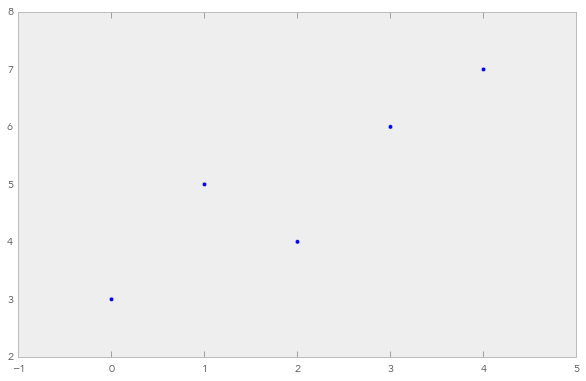

In [3]:
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
plt.scatter(X, Y)

We can accomplish this by first pushing variables to R, fitting a model and returning the results. The line magic %Rpush copies its arguments to variables of the same name in rpy2. The %R line magic evaluates the string in rpy2 and returns the results. In this case, the coefficients of a linear model.

In [4]:
%Rpush X Y
%R lm(Y~X)$coef

array([ 3.2,  0.9])

It is also possible to return more than one value with %R.

In [5]:
%R resid(lm(Y~X)); coef(lm(X~Y))

array([-2.5,  0.9])

One can also easily capture the results of %R into python objects. Like R, the return value of this multiline expression (multiline in the sense that it is separated by ';') is the final value, which is 
the *coef(lm(X~Y))*. To pull other variables from R, there is one more magic.

There are two more line magics, %Rpull and %Rget. Both are useful after some R code has been executed and there are variables
in the rpy2 namespace that one would like to retrieve. The main difference is that one
 returns the value (%Rget), while the other pulls it to self.shell.user_ns (%Rpull). Imagine we've stored the results
of some calculation in the variable "a" in rpy2's namespace. By using the %R magic, we can obtain these results and
store them in b. We can also pull them directly to user_ns with %Rpull. They are both views on the same data.

In [6]:
b = %R a=resid(lm(Y~X))
%Rpull a
print(a)
assert id(b.data) == id(a.data)
%R -o a

[-0.2  0.9 -1.   0.1  0.2]


## Plotting and capturing output

R's console (i.e. its stdout() connection) is captured by ipython, as are any plots which are published as PNG files like the notebook with arguments --pylab inline. As a call to %R may produce a return value (see above) we must ask what happens to a magic like the one below. The R code specifies that something is published to the notebook. If anything is published to the notebook, that call to %R returns None.


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



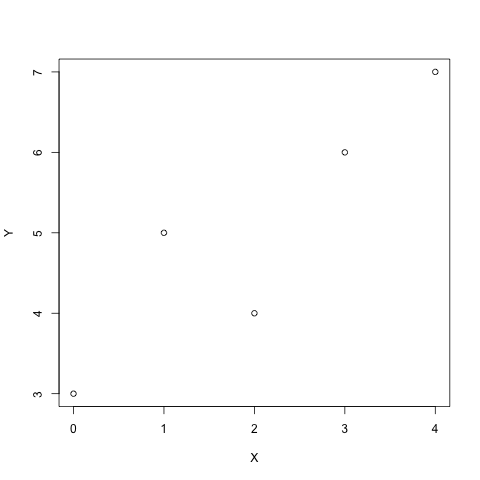

v1 is: [ 10.]
v2 is: [ 10.]


In [7]:
from __future__ import print_function
v1 = %R plot(X,Y); print(summary(lm(Y~X))); vv=mean(X)*mean(Y)
print('v1 is:', v1)
v2 = %R mean(X)*mean(Y)
print('v2 is:', v2)

## Cell level magic

Often, we will want to do more than a simple linear regression model. There may be several lines of R code that we want to 
use before returning to python. This is the cell-level magic.


For the cell level magic, inputs can be passed via the -i or --inputs argument in the line. These variables are copied 
from the shell namespace to R's namespace using rpy2.robjects.r.assign. It would be nice not to have to copy these into R: rnumpy ( http://bitbucket.org/njs/rnumpy/wiki/API ) has done some work to limit or at least make transparent the number of copies of an array. This seems like a natural thing to try to build on. Arrays can be output from R via the -o or --outputs argument in the line. All other arguments are sent to R's png function, which is the graphics device used to create the plots.

We can redo the above calculations in one ipython cell. We might also want to add some output such as a summary
 from R or perhaps the standard plotting diagnostics of the lm.


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



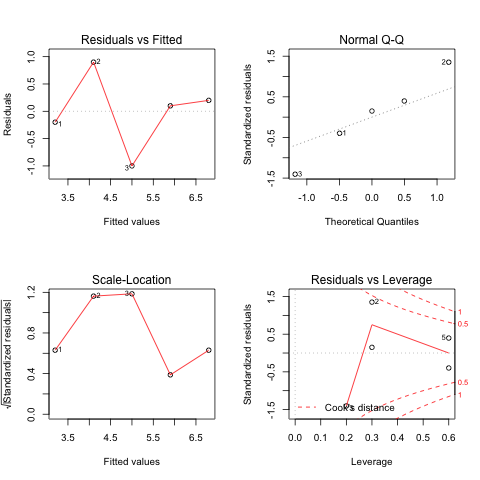

In [8]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)

# octavemagic: Octave inside IPython

The `octavemagic` extension provides the ability to interact with Octave.  It depends on the `oct2py` and `h5py` packages,
which may be installed using `easy_install`.  It has been closely modeled after the R extension, so many of its names and usage patterns are the same.

To enable the extension, load it as follows:

In [109]:
%load_ext octavemagic

## Overview

Loading the extension enables three magic functions: `%octave`, `%octave_push`, and `%octave_pull`.

The first is for executing one or more lines of Octave, while the latter allow moving variables between the Octave and Python workspace.
Here you see an example of how to execute a single line of Octave, and how to transfer the generated value back to Python:

In [110]:
x = %octave [1 2; 3 4];
x

array([[ 1.,  2.],
       [ 3.,  4.]])

In [111]:
a = [1, 2, 3]

%octave_push a
%octave a = a * 2;
%octave_pull a
a

array([[2, 4, 6]])

When using the cell magic, `%%octave` (note the double `%`), multiple lines of Octave can be executed together.  Unlike
with the single cell magic, no value is returned, so we use the `-i` and `-o` flags to specify input and output variables.

In [116]:
%%octave -i x -o y
y = x + 3;

In [117]:
y

array([[ 4.,  5.],
       [ 6.,  7.]])

## Plotting

Plot output is automatically captured and displayed, and using the `-f` flag you may choose its format (currently, `png` and `svg` are supported).

In [118]:
%%octave -f svg

p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

The plot size is adjusted using the `-s` flag:

In [119]:
%%octave -s 500,500

# butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

In [120]:
%%octave -s 600,200 -f png

subplot(121);
[x, y] = meshgrid(0:0.1:3);
r = sin(x - 0.5).^2 + cos(y - 0.5).^2;
surf(x, y, r);

subplot(122);
sombrero()